In [ ]:
# Bibliotecas padrão
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import requests
import warnings


In [ ]:
producao = pd.read_csv('Dados/Dados_Embrapa/Producao/Tbl_Producao.csv', sep=';', encoding='utf-8')


,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,11,46,0,0,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,26,95,4,21,0,0,0,0,117,698
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,3660,25467,6261,32605,2698,6741,7630,45367,4806,31853
3,4,Angola,0,0,0,0,0,0,0,0,...,345,1065,0,0,0,0,4068,4761,0,0
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
producao.head()

,id,control,produto,1970,1971,1972,1973,1974,1975,1976,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,VINHO DE MESA,VINHO DE MESA,217208604,154264651,146953297,116710345,193875345,177401209,144565438,...,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611,169762429
1,2,vm_Tinto,Tinto,174224052,121133369,118180926,88589019,146544484,144274134,118360170,...,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214,139320884
2,3,vm_Branco,Branco,748400,1160500,1812367,243900,4138768,1441507,1871473,...,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430,27910299
3,4,vm_Rosado,Rosado,42236152,31970782,26960004,27877426,43192093,31685568,24333795,...,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968,2531246
4,5,VINHO FINO DE MESA (VINIFERA),VINHO FINO DE MESA (VINIFERA),23899346,23586062,21078771,12368410,31644124,39424590,34500590,...,38464314,37148982,18070626,44537870,38707220,37615422,32516686,43474998,47511796,46268556


In [ ]:
# Visualizar o tamanho do dataframe Producao
print(f"Linhas da tabela Produção: {producao.shape[0]}")
print(f"Colunas da tabela Produção: {producao.shape[1]}")

colum_ness = producao.shape[1] - 15 # Verificar o número de colunas
print(f"Colunas da tabela Produção: {colum_ness}")

Linhas da tabela Produção: 51
Colunas da tabela Produção: 57
Linhas da tabela Comercio: 62
Colunas da tabela Comercio: 57
Colunas da tabela Produção: 42


In [6]:
# Manter primeiras 3 colunas e as últimas 15 colunas
producao_tratada = pd.concat([producao.iloc[:, :3], producao.iloc[:, -15:]], axis=1)
producao_tratada.head(10)

# Adiciona a coluna 'categoria' com valores vazios inicialmente
producao_tratada['categoria'] = None

# Preenche os valores com base na coluna 'control'
producao_tratada.loc[producao_tratada['control'].str.startswith('vm_'), 'categoria'] = 'VINHO DE MESA'
producao_tratada.loc[producao_tratada['control'].str.startswith('vv_'), 'categoria'] = 'VINHO FINO DE MESA'
producao_tratada.loc[producao_tratada['control'].str.startswith('su_'), 'categoria'] = 'SUCO'
producao_tratada.loc[producao_tratada['control'].str.startswith('de'), 'categoria'] = 'DERIVADOS'

producao_final = producao_tratada.dropna(axis='columns')


In [7]:
# Retira os dados somados e cria uma categoria para os dados de produção
colunas_para_manter = ['categoria'] + producao_tratada.dropna(axis='columns').columns.tolist()
producao_tratada = producao_tratada[colunas_para_manter]
producao_tratada = producao_tratada.dropna(subset=['categoria'])

In [8]:
producao_tratada.head()

,categoria,id,control,produto,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,VINHO DE MESA,2,vm_Tinto,Tinto,164143454,157290088,210113358,175875432,163111797,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214,139320884
2,VINHO DE MESA,3,vm_Branco,Branco,39211278,35408083,46007504,34938249,32066403,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430,27910299
3,VINHO DE MESA,4,vm_Rosado,Rosado,2063474,2569809,1719887,1963356,1726022,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968,2531246
5,VINHO FINO DE MESA,6,vv_Tinto,Tinto,18209043,11401406,24104740,24027589,23156458,17208996,16745896,8774847,21442212,19118254,17389377,15451883,20433249,24417918,23615783
6,VINHO FINO DE MESA,7,vv_Branco,Branco,21366975,13013027,22739426,20647238,21906349,20054804,19561966,8705066,21928400,18297257,18193055,15487915,20867999,20896613,20693437


In [9]:
producao_final = pd.melt(producao_tratada, id_vars=['categoria', 'produto','id'], value_vars= producao_tratada.iloc[:,-15:], var_name="Ano", value_name="Total_Produzido")


In [10]:
producao_final.head(20)


,categoria,produto,id,Ano,Total_Produzido
0,VINHO DE MESA,Tinto,2,2009,164143454
1,VINHO DE MESA,Branco,3,2009,39211278
2,VINHO DE MESA,Rosado,4,2009,2063474
3,VINHO FINO DE MESA,Tinto,6,2009,18209043
4,VINHO FINO DE MESA,Branco,7,2009,21366975
5,VINHO FINO DE MESA,Rosado,8,2009,324550
6,SUCO,Suco de uva integral,10,2009,16034003
7,SUCO,Suco de uva concentrado,11,2009,23006457
8,SUCO,Suco de uva adoçado,12,2009,674638
9,SUCO,Suco de uva orgânico,13,2009,0


In [12]:
# Visualizar o tamanho do dataframe Producao
print(f"Linhas da tabela Produção apos o tratamento: {producao_final.shape[0]}")
print(f"Colunas da tabela Produção apos o tratamento: {producao_final.shape[1]}")
# Visualizar o ano inicial e o ano final da base 
print(f"O primeiro ano registrado na tabela é : {producao_final['Ano'].min()}")
print(f"O último ano registrado na tabela é : {producao_final['Ano'].max()}")

Linhas da tabela Produção apos o tratamento: 705
Colunas da tabela Produção apos o tratamento: 5
O primeiro ano registrado na tabela é : 2009
O último ano registrado na tabela é : 2023


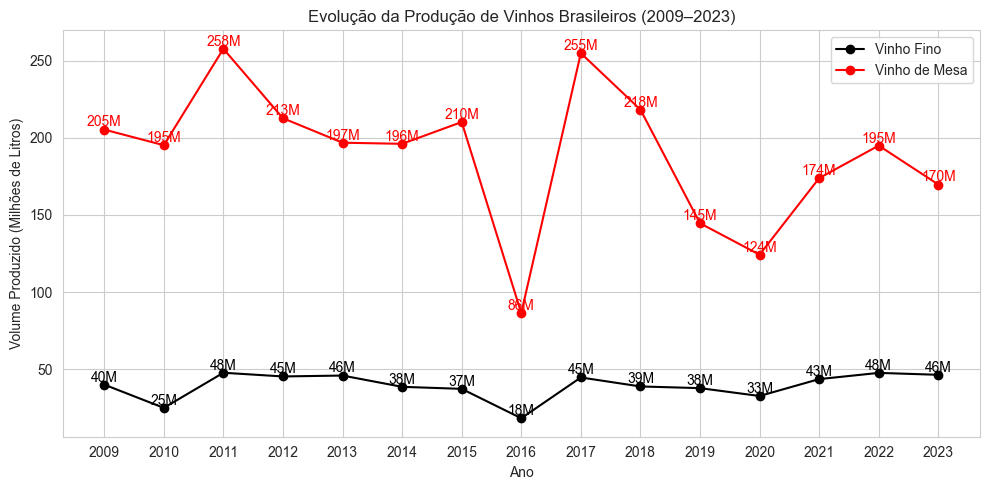

In [17]:

# Preparar dados
vinho_fino = dados_grafico[dados_grafico['categoria'] == 'VINHO FINO DE MESA']
vinho_mesa = dados_grafico[dados_grafico['categoria'] == 'VINHO DE MESA']

anos_fino = vinho_fino['Ano']
anos_mesa = vinho_mesa['Ano']

# converter para milhões
valores_fino = vinho_fino['Total_Produzido'] / 1_000_000
valores_mesa = vinho_mesa['Total_Produzido'] / 1_000_000

# Criar o gráfico
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(anos_fino, valores_fino, marker='o', color='black', label='Vinho Fino')
ax1.plot(anos_mesa, valores_mesa, marker='o', color='red', label='Vinho de Mesa')

# Adicionar rótulos nos pontos
for i in range(len(anos_fino)):
    ax1.text(anos_fino.iloc[i], valores_fino.iloc[i] + 2, f'{valores_fino.iloc[i]:.0f}M', color='black', ha='center')
for i in range(len(anos_mesa)):
    ax1.text(anos_mesa.iloc[i], valores_mesa.iloc[i] + 2, f'{valores_mesa.iloc[i]:.0f}M', color='red', ha='center')

# Títulos e eixos
ax1.set_title("Evolução da Produção de Vinhos Brasileiros (2009–2023)")
ax1.set_xlabel("Ano")
ax1.set_ylabel("Volume Produzido (Milhões de Litros)")
ax1.legend()
ax1.grid(True)
plt.tight_layout()
plt.show()


In [31]:
producao_final.head(5)

,categoria,produto,id,Ano,Total_Produzido
0,VINHO DE MESA,Tinto,2,2009,164143454
1,VINHO DE MESA,Branco,3,2009,39211278
2,VINHO DE MESA,Rosado,4,2009,2063474
3,VINHO FINO DE MESA,Tinto,6,2009,18209043
4,VINHO FINO DE MESA,Branco,7,2009,21366975


In [43]:

# Agrupar por categoria e ano (somar os tipos)
producao_final['Ano'] = producao_final['Ano'].astype(int)
df_grouped = producao_final.groupby(['categoria', 'Ano'])['Total_Produzido'].sum().reset_index()
df_grouped = df_grouped[df_grouped['categoria'].isin(['VINHO DE MESA', 'VINHO FINO DE MESA'])]
# Criar resumo por categoria
resumo = []

for categoria in df_grouped['categoria'].unique():
    df_cat = df_grouped[df_grouped['categoria'] == categoria]
    total_15anos = df_cat['Total_Produzido'].sum()
    media_ate_2016 = df_cat[df_cat['Ano'] <= 2016]['Total_Produzido'].mean()
    media_pos_16_19 = df_cat[df_cat['Ano'].between(2016, 2019)]['Total_Produzido'].mean()
    media_pos_19 = df_cat[df_cat['Ano'] > 2019]['Total_Produzido'].mean()
    yoy = (df_cat[df_cat['Ano'] == 2023]['Total_Produzido'].sum() / df_cat[df_cat['Ano'] == 2022]['Total_Produzido'].sum()) -1 

    resumo.append({
        'Categoria': categoria,
        'Total (2009–2023)': total_15anos,
        'Média até 2016': media_ate_2016,
        'Média após 2016': media_pos_16_19,
        'Média após 2019': media_pos_19,
        'Crescimento Anual (2023-2024)': yoy
    })

df_resumo_final = pd.DataFrame(resumo)


In [44]:
df_resumo_final.head()

,Categoria,Total (2009–2023),Média até 2016,Média após 2016,Média após 2019,Crescimento Anual (2023-2024)
0,VINHO DE MESA,2841923902,1.951261e+08,1.760849e+08,165723612.5,-0.129565
1,VINHO FINO DE MESA,587604482,3.712149e+07,3.473278e+07,42443009.0,-0.026167


In [ ]:

anos = list(range(2009, 2024))

# Agrupar por categoria e calcular as métricas
grupo = producao_final.groupby('categoria')

for categoria, dados in grupo:
    dados_15 = producao_final[producao_final['Ano'].between(2009, 2023)]
    media_ate_2016 = producao_final[producao_final['Ano'] <= 2016]['Total_Produzido'].mean()
    media_pos_2016 = producao_final[producao_final['Ano'] > 2016]['Total_Produzido'].mean()
    total = producao_final['Total_Produzido'].sum()

resultados = []

resultados.append({
        'Categoria': categoria,
        'Total (2009–2023)': total,
        'Média até 2016': media_ate_2016,
        'Média após 2016': media_pos_2016
    })


# Transformar em DataFrame
df_resultado_final = pd.DataFrame(resultados)
df_resultado_final.head()

,Categoria,Total (2009–2023),Média até 2016,Média após 2016
0,VINHO FINO DE MESA,5958766442,7.823790e+06,9.170278e+06


In [18]:
producao_final.head()

,categoria,produto,id,Ano,Total_Produzido
0,VINHO DE MESA,Tinto,2,2009,164143454
1,VINHO DE MESA,Branco,3,2009,39211278
2,VINHO DE MESA,Rosado,4,2009,2063474
3,VINHO FINO DE MESA,Tinto,6,2009,18209043
4,VINHO FINO DE MESA,Branco,7,2009,21366975


In [ ]:
#Estatisticas

producao_final['Ano'] = producao_final['Ano'].astype(int)

quantidade_total = producao_final[
	(producao_final['Ano'].between(2009, 2023)) &
	(producao_final['categoria'].isin(['VINHO DE MESA', 'VINHO FINO DE MESA']))
]['Total_Produzido'].sum() / 1_000_000
print(f"Quantidade total produzido de vinho pelo Brasil: {quantidade_total:.2f} milhões de litros")



quantidade_total_mesa = producao_final[
	(producao_final['Ano'].between(2009, 2023)) &
	(producao_final['categoria'].isin(['VINHO DE MESA']))
]['Total_Produzido'].sum() / 1_000_000
print(f"Quantidade total produzido de vinho de mesa pelo Brasil: {quantidade_total_mesa:.2f} milhões de litros")


quantidade_total_finos = producao_final[
	(producao_final['Ano'].between(2009, 2023)) &
	(producao_final['categoria'].isin(['VINHO FINO DE MESA']))
]['Total_Produzido'].sum() / 1_000_000
print(f"Quantidade total produzido de vinho fino de mesa pelo Brasil: {quantidade_total_finos:.2f} milhões de litros")


Quantidade total produzido de vinho pelo Brasil: 3429.53 milhões de litros
Quantidade total produzido de vinho de mesa pelo Brasil: 2841.92 milhões de litros
Quantidade total produzido de vinho fino de mesa pelo Brasil: 587.60 milhões de litros
